**ML Lab 2**

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ML_LAB_PROG/blob/main/02_housing_solution27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>


# Note!

Check hints in [Cheatsheet](https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ML_LAB_PROG/blob/main/00_cheatsheet.ipynb)


# Task 2.1

_Get data from url_housing and visualize_

- Preview data, get statistics (.head(), .inf(), .describe())
- Print data histogram

_Type your code below_


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
# import urllib.request

# getting data
url_housing = "https://github.com/marcinsawinski/UEP_KIE_ML_LAB_PROG/raw/main/datasets/housing/housing.csv"
housing = pd.read_csv(url_housing)

In [2]:
# preview data
housing.head(3)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [3]:
# check dataset features
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# check values of categorical feature
housing["ocean_proximity"].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
# get stats
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


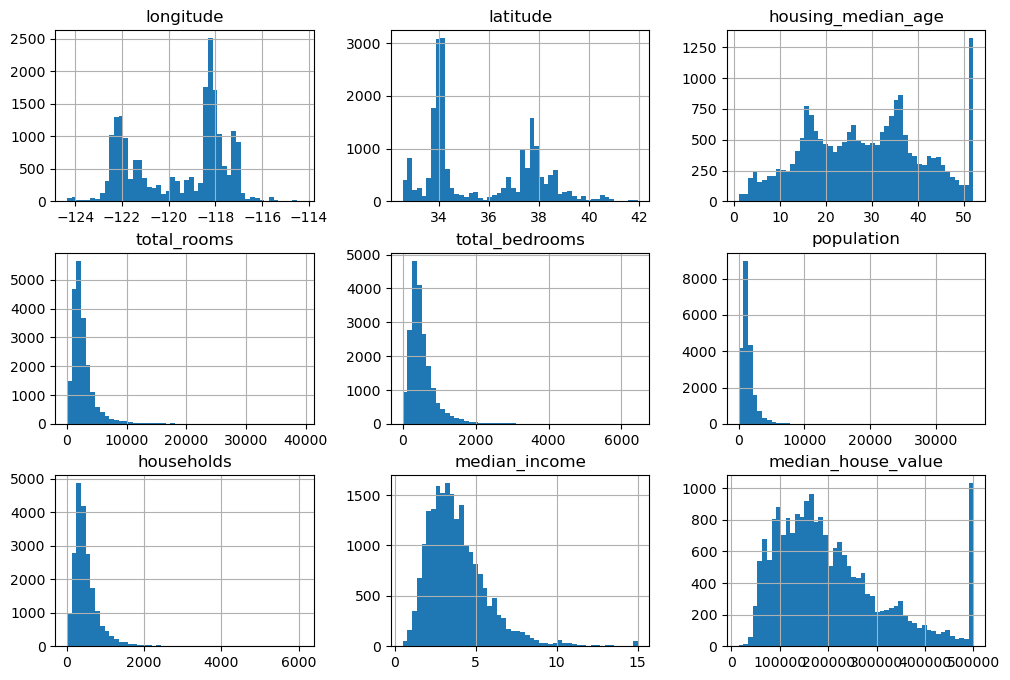

In [6]:
# print histogram for each feature
housing.hist(bins=50, figsize=(12, 8))
plt.show()


In [7]:
# check count of null values
housing.isna().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Task 2.2

_Create train / test split (80/20)_

- Create random split
- Create stratifed split on income class (5 strata)

_Type your code below_


In [8]:
# imort modules
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix


In [9]:
# make random  split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [10]:
# generate categorical feature for median_income
housing["income_cat"] = pd.cut(
    housing["median_income"], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5]

)

# generate stratified splitter
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42
)


In [11]:
# onece splt is done you can remove the feature
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### Extra code for 2.2

In [12]:
# check new distribution of values for new categorical feature
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

Text(0, 0.5, 'Number of districts')

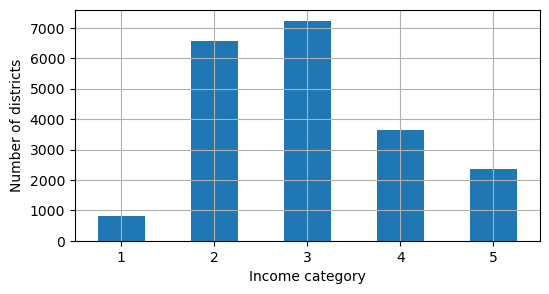

In [13]:
# plot histogram for new categorical feature
housing["income_cat"].value_counts().sort_index().plot.bar(
    rot=0, grid=True, figsize=(6, 3)
)
plt.xlabel("Income category")
plt.ylabel("Number of districts")


In [14]:
# generate stratified split - version 1
# generate n_splits splits
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
strat_splits = []

for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])
strat_train_set, strat_test_set = strat_splits[0]


In [15]:
# check category count ratio in full dataset
housing["income_cat"].value_counts() / len(housing)


income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [16]:
# check category count ratio in train dataset
strat_train_set["income_cat"].value_counts() / len(strat_train_set)


income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [17]:
# check category count ratio in test dataset
strat_test_set["income_cat"].value_counts() / len(strat_test_set)


income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

# Task 2.3

_Visualize_

- Create plot using geographical data (lang, lat). Add alpha. Add color for median_house_value. Add size for population. OPTIONAL Add basemap (e.g. plotly.express)
- Create correlation matrix
- Plot correlation for median_income and median_house_value

_Explore_

- Make train dataframe copy
- Create 3 new features:
  - rooms_per_household = total_rooms / households,
  - bedrooms_per_room = total_bedrooms / total_rooms
  - population_per_household = population / households
- Check correlation of new features

_Type your code below_


In [18]:
# you'll be playing with the data set - better make a copy
housing = strat_train_set.copy()


<Axes: xlabel='longitude', ylabel='latitude'>

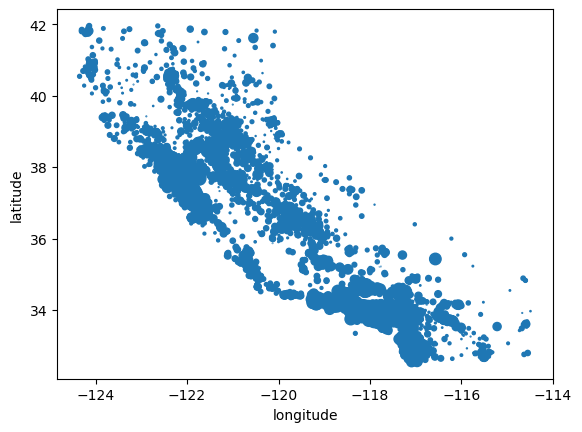

In [19]:
# basic plot
housing.plot(kind="scatter", x="longitude", y="latitude", s=housing["population"] / 100)


<Axes: xlabel='longitude', ylabel='latitude'>

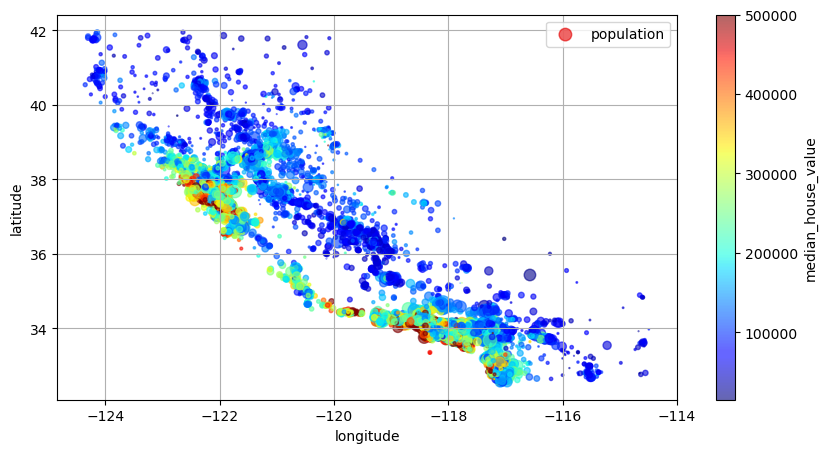

In [20]:
# plot scatter plot with geo coords, color for median_house_value,  size for population.
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    grid=True,
    alpha=0.6,
    s=housing["population"] / 100,
    c="median_house_value",
    cmap="jet",
    figsize=(10, 5),
    legend=True,
    colorbar=True,
    label="population",
)


In [21]:
# check correlations ( only subset to fit on screen)
attributes = [
    "median_house_value",
    "median_income",
    "total_rooms",
    "housing_median_age",
]
housing[attributes].corr()

,median_house_value,median_income,total_rooms,housing_median_age
median_house_value,1.000000,0.688380,0.137455,0.102175
median_income,0.688380,1.000000,0.197720,-0.127043
total_rooms,0.137455,0.197720,1.000000,-0.361710
housing_median_age,0.102175,-0.127043,-0.361710,1.000000


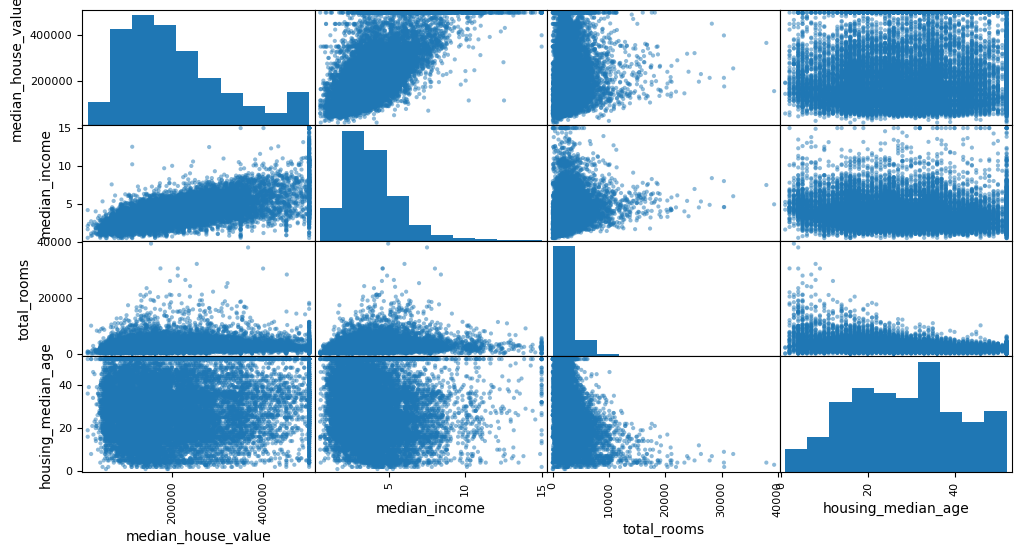

In [22]:
# plot correlations (selected features)
scatter_matrix(housing[attributes], figsize=(12, 6))
plt.show()

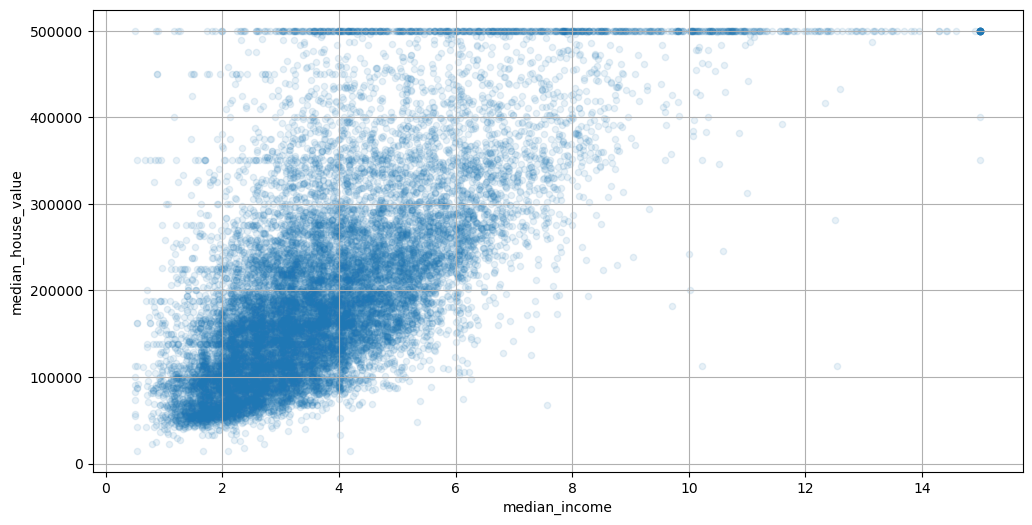

In [23]:
# plot correlations (1 feature)
housing.plot(
    kind="scatter",
    x="median_income",
    y="median_house_value",
    alpha=0.1,
    grid=True,
    figsize=(12, 6),
)
plt.show()


In [24]:
# generate new feature using pandas
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]


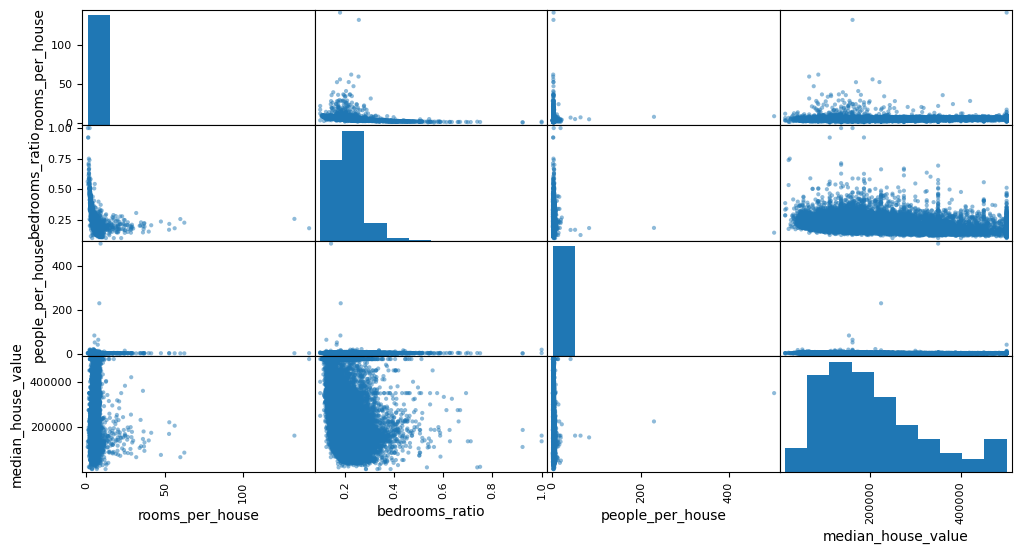

In [25]:
# plot correlations (new features)
scatter_matrix(
    housing[
        ["rooms_per_house", "bedrooms_ratio", "people_per_house", "median_house_value"]
    ],
    figsize=(12, 6),
)
plt.show()


In [26]:
# print correlations of median_house_value
corr_matrix = housing.drop(columns="ocean_proximity").corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688380
income_cat            0.642887
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

# Task 2.4

_Prepare_

- Make train dataframe copy, drop label
- Make train dataframe copy with label only

_Clean_

- Fill missing total_bedrooms with median value (when using inputer, watch out for categorical features)
- Convert categorical features into one-hot features

_Type your code below_


In [27]:
# imports
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder


In [28]:
# make copies of daframes
housing = strat_train_set.drop(columns="median_house_value").copy()
housing_labels = strat_train_set["median_house_value"].copy()


In [29]:
# pick all numerical feaatures to a separate dataframe
housing_num = housing.select_dtypes(include=[np.number])


In [30]:
l = [True,False,True]
l

[True, False, True]

In [31]:
# check median values (50 percentile)
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000
mean,-119.573125,35.637746,28.577156,2639.402798,538.949094,1425.513929,499.990189,3.870428
std,2.000624,2.133294,12.585738,2185.287466,423.862079,1094.795467,382.865787,1.891936
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.000000,296.000000,787.000000,279.000000,2.562500
50%,-118.510000,34.260000,29.000000,2125.000000,434.000000,1167.000000,408.000000,3.538500
75%,-118.010000,37.720000,37.000000,3154.000000,645.000000,1726.000000,603.000000,4.750000
max,-114.490000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100


In [32]:
# check median values (same but directly)
housing_num.median().values


array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [33]:
# fill NA with median using imputer
# create imputer object
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)
# check fitted values (should be median as in call above)
imputer.statistics_


array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [34]:
# run inputer to transform dataframe (i.e. fill NA with median)
X = imputer.transform(housing_num)
# recreate pandas dataframe to nicely display data
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [35]:
# check where the null where
null_rows_idx = housing.isnull().any(axis=1)
# display datapoints with nulls
housing.loc[null_rows_idx]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND,3
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN,3
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN,3
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN,4
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN,5
...,...,...,...,...,...,...,...,...,...,...
2348,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,3
366,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,NEAR OCEAN,3
18241,-121.44,38.54,39.0,2855.0,NaN,1217.0,562.0,3.2404,INLAND,3
18493,-116.21,33.75,22.0,894.0,NaN,830.0,202.0,3.0673,INLAND,3


In [36]:
# display same datapoints on transformed dataframe - nulls should be gone
housing_tr.loc[null_rows_idx]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020
...,...,...,...,...,...,...,...,...
2348,-122.70,38.35,14.0,2313.0,434.0,954.0,397.0,3.7813
366,-122.50,37.75,44.0,1819.0,434.0,1137.0,354.0,3.4919
18241,-121.44,38.54,39.0,2855.0,434.0,1217.0,562.0,3.2404
18493,-116.21,33.75,22.0,894.0,434.0,830.0,202.0,3.0673


In [37]:
# preview categorical feature
housing["ocean_proximity"].value_counts()


ocean_proximity
<1H OCEAN     7274
INLAND        5301
NEAR OCEAN    2089
NEAR BAY      1846
ISLAND           2
Name: count, dtype: int64

In [38]:
# pick all categorical features to separate dataframe (i.e. only one in our example)
housing_cat = housing[["ocean_proximity"]]


In [39]:
# encode categoricalfeature as ordinal
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
# check resulting categories
ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [40]:
# check encoded feature
pd.DataFrame(
    housing_cat_encoded, columns=housing_cat.columns, index=housing_cat.index
).value_counts()


ocean_proximity
0.0                7274
1.0                5301
4.0                2089
3.0                1846
2.0                   2
Name: count, dtype: int64

In [41]:
# ordinal encoder is not a good fit (categoriesa re not ordinal). Try onehot
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
# display encoder output - toarray() will convert from sparse to dense format
housing_cat_1hot.toarray()


array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [42]:
# check orginal categories
cat_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [43]:
# check encoded new features names
cat_encoder.get_feature_names_out()


array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [44]:
# a simple example of one hot using only pandas with method get_dummies
# generate a test dataframe
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
df_test


,ocean_proximity
0,INLAND
1,NEAR BAY


In [45]:
# make onehot with pandas
pd.get_dummies(df_test)


,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [46]:
# ganerate test caregories that did not exist in orginal dataset so encoder doesnt know it
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)


,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [47]:
# set encoder param handle_unknown = "ignore" to assure it will skip the new category ( see - all zeros in first line)
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown).toarray()


array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [48]:
# convert result to pandas dataframe and print
df_output = pd.DataFrame(
    cat_encoder.transform(df_test_unknown).toarray(),
    columns=cat_encoder.get_feature_names_out(),
    index=df_test_unknown.index,
)
df_output


,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


In [49]:
# check feature name used for encoder
cat_encoder.feature_names_in_


array(['ocean_proximity'], dtype=object)

# Task 2.5

_Clean_

- Remove outliers with Isolation forest
- Standardize numerical variables
- Try fixing distribution od population variable using:
  - log function
  - percentiles
- Add rbf measure for value 35 of housing_median_age

_Type your code below_


In [50]:
# imports

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import LinearRegression


In [51]:
# remove outliers with IsolationForest
isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)
# display outliers
housing_tr[outlier_pred == -1]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
2237,-122.47,37.73,52.0,2151.0,280.0,762.0,274.0,10.7309
15812,-117.11,32.68,36.0,26.0,14.0,58.0,23.0,1.9107
11620,-121.07,37.71,39.0,223.0,37.0,92.0,37.0,3.3750
1456,-122.39,41.41,23.0,910.0,199.0,370.0,169.0,1.7448
...,...,...,...,...,...,...,...,...
3070,-117.22,33.87,16.0,56.0,7.0,39.0,14.0,2.6250
20136,-120.76,38.12,7.0,7188.0,1288.0,3175.0,1115.0,3.8488
11072,-115.62,33.04,17.0,1009.0,231.0,745.0,217.0,2.0463
11877,-120.59,35.13,8.0,6638.0,1054.0,2710.0,966.0,4.6776


In [52]:
# scale numnerical data using normalization
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)
# print result
housing_num_min_max_scaled


array([[-0.60851927,  0.11702128,  1.        , ..., -0.80701754,
        -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, ..., -0.91866029,
        -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, ..., -0.93141946,
        -0.92458466, -0.73336919],
       ...,
       [ 0.47870183, -0.99148936, -0.52941176, ..., -0.65513434,
        -0.71663244, -0.50873781],
       [ 0.20689655, -0.6787234 ,  0.41176471, ..., -0.78873758,
        -0.68751167, -0.49716556],
       [-0.60649087,  0.08723404,  0.68627451, ..., -0.91669734,
        -0.92122457, -0.61608805]])

In [53]:
# scale numnerical data using standarization
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)
# print result
housing_num_std_scaled


array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]])

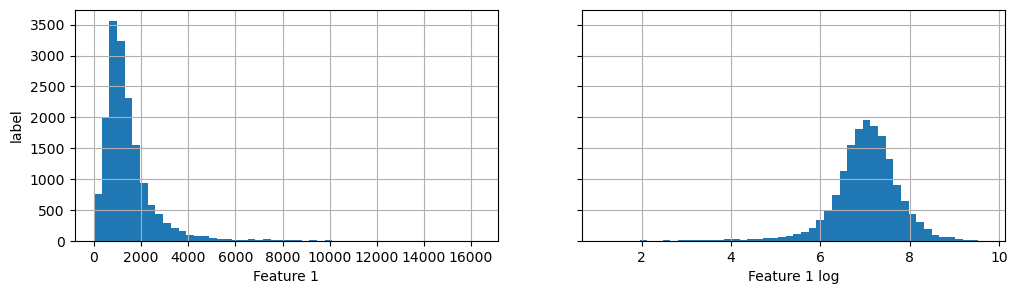

In [54]:
# plot population and population log - does it help to make symmetrical distibution?
fig, axs = plt.subplots(1, 2, figsize=(12, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Feature 1")
axs[1].set_xlabel("Feature 1 log")
axs[0].set_ylabel("label")
plt.show()


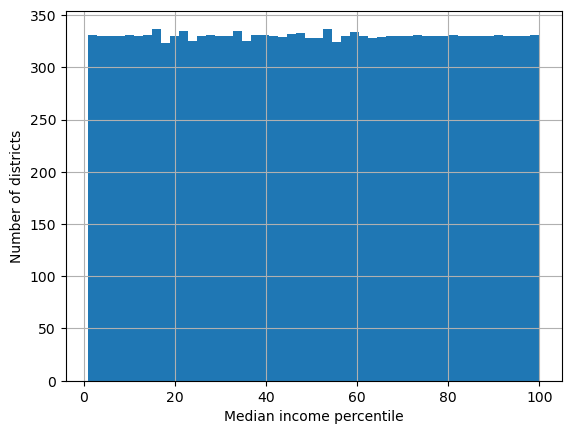

In [55]:
# plot  median_income into transfomed into percentile categories
percentiles = [np.percentile(housing["median_income"], p) for p in range(1, 100)]
flattened_median_income = pd.cut(
    housing["median_income"],
    bins=[-np.inf] + percentiles + [np.inf],
    labels=range(1, 100 + 1),
)
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()


In [56]:
# add new feature as simiarity (distance) to 35yo of housing_median_age feature

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)


In [3]:
# draw rbf
ages = np.linspace(
    housing["housing_median_age"].min(), housing["housing_median_age"].max(), 500
).reshape(-1, 1)
gamma1 = 0.1
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.tick_params(axis="y", labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
plt.show()


NameError: name 'np' is not defined

# Task 2.6

_Generate custom transformations_

- add log transformer for population
- add rbf measure for value 35 of housing_median_age
- add rooms_per_household, population_per_household, rooms_per_household (last one optional set by hyperparamter)

\_Generate custom pipeline to combine transformations\_\_

- pipeline for preprocessing the numerical attributes
  - median inputer
  - attributs adder
  - StandardScaler
- full pipeline witn numerical pipeline the numerical attributes and OneHotEncoder for categorical attributes

_Type your code below_


In [58]:
# imports
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


In [59]:
# make a log tranfomation
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])


In [60]:
# make a log tranfomation
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.0]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])


In [61]:
# make a tranfomation that adds columns

# get column indexes
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names
]

# define new class
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[
                X, rooms_per_household, population_per_household, bedrooms_per_room
            ]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [62]:
# get new cols back to pandas
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns) + ["rooms_per_household", "population_per_household"],
    index=housing.index,
)
housing_extra_attribs.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
13096,-122.42,37.8,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY,2,3.211799,1.524178
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN,5,5.504202,1.865546
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.433,INLAND,2,5.334975,2.768473
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND,2,5.351282,2.365385
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN,3,3.725256,1.631399


In [63]:
# make a pipeline whtat combines 3 transformations for numnerical columns
num_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("attribs_adder", CombinedAttributesAdder()),
        ("std_scaler", StandardScaler()),
    ]
)
# run the piplne
housing_num_tr = num_pipeline.fit_transform(housing_num)


In [64]:
# make a pipeline that combines transfromatin for numerical and categorical features
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer(
    [
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ]
)
housing_prepared = full_pipeline.fit_transform(housing)


# Task 2.7

_Select and Train a Model_

- Fit LinearRegression on data prepared with full pipline. Check SME, RSME and MAE
- Fit DecisionTreeRegressor. Check RSME.
  _Type your code below_


# Task 2.8

_Tune Model_

- Tune DecisionTreeRegressor with Grid Search with param grid:

```python
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
```

- Tune DecisionTreeRegressor with RandomizedSearchCV

```python
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }
```

- Check scores
- Check feature importances

_Type your code below_


# Task 2.9

_Evaluate Your System on the Test Set_

- Predict result for test set with best_estimator. Check RSME.
- Calcualte 95% confidence interval for the test RMSE

_Type your code below_


# Task 2.10

Extra tasks:

- Write a full pipeline with both preparation and prediction (full_pipeline and LinearRegression)
- Calculate 10 clusters and add RBF similarities features

_Type your code below_


# Task 2.11

\_Try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Note that SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. How does the best `SVR` predictor perform?


# Task 2.12

_Try replacing the `GridSearchCV` with a `RandomizedSearchCV`._


# Task 2.13

_Try adding a `SelectFromModel` transformer in the preparation pipeline to select only the most important attributes._


# Task 2.14

_Try creating a custom transformer that trains a k-Nearest Neighbors regressor (`sklearn.neighbors.KNeighborsRegressor`) in its `fit()` method, and outputs the model's predictions in its `transform()` method. Then add this feature to the preprocessing pipeline, using latitude and longitude as the inputs to this transformer. This will add a feature in the model that corresponds to the housing median price of the nearest districts._

Rather than restrict ourselves to k-Nearest Neighbors regressors, let's create a transformer that accepts any regressor. For this, we can extend the `MetaEstimatorMixin` and have a required `estimator` argument in the constructor. The `fit()` method must work on a clone of this estimator, and it must also save `feature_names_in_`. The `MetaEstimatorMixin` will ensure that `estimator` is listed as a required parameters, and it will update `get_params()` and `set_params()` to make the estimator's hyperparameters available for tuning. Lastly, we create a `get_feature_names_out()` method: the output column name is the ...


# Task 2.15

_Automatically explore some preparation options using `RandomSearchCV`._


# Task 2.16

_Try to implement the `StandardScalerClone` class again from scratch, then add support for the `inverse_transform()` method: executing `scaler.inverse_transform(scaler.fit_transform(X))` should return an array very close to `X`. Then add support for feature names: set `feature_names_in_`in the`fit()`method if the input is a DataFrame. This attribute should be a NumPy array of column names. Lastly, implement the`get*feature_names_out()`method: it should have one optional`input_features=None`argument. If passed, the method should check that its length matches`n_features_in*`, and it should match `feature*names_in*`if it is defined, then`input*features`should be returned. If`input_features`is`None`, then the method should return `feature_names_in*`if it is defined or`np.array(["x0", "x1", ...])`with length`n*features_in*` otherwise.\_
